<img src="img/usmlogo.png" style="float:right;height:85px"> <img src="img/dilogo.png" style="float:left;height:90px">
<center>
    <h1> Laboratorio 2 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> Martin Salinas Scussolin; 201773557-0 ; Malla Nueva </h4>
    <h4> José Quezada Silva ; 201773528-7 ; Malla Nueva </h4>
</center>
<p>
<center><h4>Mayo 2019</h4></center>
</p>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día 3 de Mayo.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab2.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**


---
## 1. Retención de Clientes

La fuga (*churn*, término en inglés) de clientes es algo que muchas empresas de hoy en día sufren, la fuga puede deberse a muchos factores, uno de estos podría ser alguna característica del servicio en sí que provee la empresa. En esta sección usted trabajará con un dataset de "Telco", una empresa de telecomunicaciones, donde verá varios datos relacionados al plan de los clientes, uno de estos campos siendo "*Churn*", si el cliente se fugó o no. 

El archivo a utilizar es "churn.csv" y para información extra puede referirse a [este enlace](https://www.kaggle.com/blastchar/telco-customer-churn)

>a) Haga un análisis exploratorio **a su criterio** del dataset y extraiga 3 conclusiones acerca del conjunto de datos

### Desarrollo

In [153]:
import pandas as pd
import scipy as sc
import numpy as np
from itertools import zip_longest
from numpy import random as rd
import random
from matplotlib import pyplot as plt

In [13]:
#inclusion dataset
df = pd.read_csv("churn.csv") 
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Después de cargar los datos, se separan por género, para luego ser filtrados por la columna tenure, la cual muestra la duración de los clientes en la compañía. Esto se realiza con el fin de poder graficar los datos y tener una mejor apreciación de estos.

In [28]:
dfFemale = df.loc[(df["gender"] == 'Female')]
dfMale = df.loc[(df["gender"] == 'Male')]

dfToPlotMale = pd.DataFrame(dfMale.groupby("tenure").size())
dfToPlotMale.columns=["Men"]

dfToPlotFemale = pd.DataFrame(dfFemale.groupby("tenure").size())
dfToPlotFemale.columns=["Women"]

dfToPlot = pd.concat([dfToPlotMale,
                      dfToPlotFemale],
                      sort=False,
                      axis=1)

In [5]:
dfToPlot.describe()[1:]

,Men,Women
mean,48.698630,47.780822
std,40.917154,37.016981
min,6.000000,5.000000
25%,33.000000,32.000000
50%,38.000000,38.000000
75%,50.000000,48.000000
max,329.000000,284.000000


Se usa el método describe de pandas para obtener un análisis básico de los datos separados anteriormente. 
Se puede ver que los datos son similares entre hombres y mujeres, estos se asemejan tanto como en los cuartiles, donde la diferencia es de un mes. Además, se puede ver que el mayor tiempo que duró un cliente hombre es mayor a la máxima estadía de un cliente mujer. En relación a la desviación estándar de los datos, se puede notar que la de los hombres es mayor.
Lo anterior se puede ver reflejado en los boxplots siguientes, en los cuales se omiten los outliers para una mejor visualización de los datos.

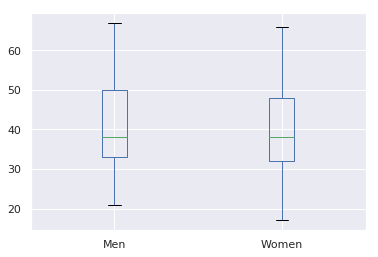

In [6]:
dfToPlot.boxplot(showfliers=False)

Se puede ver que los datos son similares entre sí, con la pequeña diferencia, que en el caso de los hombres, los datos son un poco más grandes que los de las mujeres.

> b.1) Determine la probabilidad de que: <ul>
    <li>Un cliente sea mujer dado que tiene fibra óptica </li>
    <li>Un cliente sea hombre dado que tiene fibra óptica</li>
    <li>Un cliente sea mujer dado que no tiene fibra óptica</li>
    <li>Un cliente sea hombre dado que no tiene fibra óptica</li>
    </ul>
    Además indique cuál/es de estos pares deben sumar 1 (Si es que algún par debe sumar esta cantidad). Justifique su respuesta.

### Desarrollo
Para el cálculo de las probabilidades, se utiliza probabilidad condicional, para ello, se separan los datos según los requisitos necesarios. 

**MENCIONAR QUE SE OBVIAN LAS CANTIDADES TOTALES (DENOMINADORES) PORQUE SE SIMPLIFICAN DE TODAS FORMAS.**

In [33]:
#Sea a una intersección de A y B
def p_A_if_B(a,b):
    return a/b

#Sea a una probabilidad de dependencia
def Bayes(a,b,c):
    return (a*b/c)

In [30]:

opticFiber = len(df.loc[df["InternetService"] == "Fiber optic"])/len(df)
notOpticFiber = len(df.loc[df["InternetService"] != "Fiber optic"])/len(df)

women = len(df.loc[(df["gender"] == "Female")])/len(df)
womenOF = len(df.loc[(df["gender"] == "Female") & (df["InternetService"] == "Fiber optic")])/len(df)
womenNotOf = len(df.loc[(df["gender"] == "Female") & (df["InternetService"] != "Fiber optic")])/len(df)
   
men = len(df.loc[(df["gender"] == "Male")])/len(df)
menOF = len(df.loc[(df["gender"] == "Male") & (df["InternetService"] == "Fiber optic")])/len(df)
menNotOf = len(df.loc[(df["gender"] == "Male") & (df["InternetService"] != "Fiber optic")])/len(df)
    
#round(probabilities.women,2)
print("Probabilidad de que un cliente sea mujer dado que tiene fibra óptica:", 
      p_A_if_B(womenOF, opticFiber))
print("Probabilidad de que un cliente sea hombre dado que tiene fibra óptica:" ,
      p_A_if_B(menOF, opticFiber))
print("Probabilidad de que un cliente sea mujer dado que no tiene fibra óptica:",
      p_A_if_B(womenNotOf, notOpticFiber))
print("Probabilidad de que un cliente sea hombre dado que no tiene fibra óptica:", 
      p_A_if_B(menNotOf, notOpticFiber))

Probabilidad de que un cliente sea mujer dado que tiene fibra óptica: 0.5016149870801033
Probabilidad de que un cliente sea hombre dado que tiene fibra óptica: 0.4983850129198967
Probabilidad de que un cliente sea mujer dado que no tiene fibra óptica: 0.49024575627058525
Probabilidad de que un cliente sea hombre dado que no tiene fibra óptica: 0.5097542437294148


>b.2) ¿Es posible concluir que si un cliente es hombre tiene más probabilidad de tener fibra óptica? ¿Y si es mujer? ¿Por qué?

### Desarrollo
Usando la regla de Bayes, y con los datos separados anteriormente, se pueden obtener las probabilidades solicitadas.

In [38]:
print("Probabilidad de que tenga fibra óptica dado que es hombre:",
      Bayes(p_A_if_B(menOF, opticFiber), opticFiber, men))
print("Probabilidad de que tenga fibra óptica dado que es mujer:",
      Bayes(p_A_if_B(womenOF, opticFiber), opticFiber, women))

Probabilidad de que tenga fibra óptica dado que es hombre: 0.4340365682137834
Probabilidad de que tenga fibra óptica dado que es mujer: 0.4452408256880734


Con los valores encontrados anteriormente, es posible concluir de que la probabilidad de que una cliente tenga fibra óptica dado que es mujer es ligeramente* mayor.

>c) Utilizando criterios de probabilidad condicional ¿Hay algún servicio de internet más propenso a la fuga?

### Desarrollo
Usando probabilidad condicional es posible obtener los datos. Además, se separa el dataset según es necesario.

In [104]:
IntChurn = len(df.loc[(df["Churn"] == "Yes") & (df["InternetService"] != "No") ])
IntDSL = len(df.loc[(df["InternetService"] == "DSL")])
IntDSLChurn = len(df.loc[(df["InternetService"] == "DSL") & (df["Churn"] == "Yes")])
    
IntOf = len(df.loc[(df["InternetService"] == "Fiber optic")])
IntOfChurn = len(df.loc[(df["InternetService"] == "Fiber optic") & (df["Churn"] == "Yes")])

print("Probabilidad de que un cliente se fugue dado que tiene DSL:",
      p_A_if_B(IntDSLChurn, IntDSL))
print("Probabilidad de que un cliente se fugue dado que tiene fibra óptica:",
      p_A_if_B(IntOfChurn, IntOf))

Probabilidad de que un cliente se fugue dado que tiene DSL: 0.1895910780669145
Probabilidad de que un cliente se fugue dado que tiene fibra óptica: 0.4189276485788114


Con esto, es posible concluir que si un cliente tiene fibra óptica como servicio de internet, entonces es más propenso a salirse de la compañía.

>d) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la fuga? y ¿es la fuga un buen predictor del cargo mensual de un cliente?

### Desarrollo 
Se obtienen rangos de cargo mensual, a partir de los datos mín y máx del dataset en la columna MonthlyCharges. Esto se realiza con el fin de encontrar que el intervalo más grande posee más personas las cuales se retiran de la compañía.

In [30]:
print("Máximo:", df["MonthlyCharges"].max())
print("Mínimo:", df["MonthlyCharges"].min())
df["MonthlyCharges"].groupby(pd.cut(df["MonthlyCharges"],bins=np.arange(18.25,118.75,20))).sum()

Máximo: 118.75
Mínimo: 18.25


MonthlyCharges
(18.25, 38.25]      40416.35
(38.25, 58.25]      49396.00
(58.25, 78.25]      93648.70
(78.25, 98.25]     159553.15
(98.25, 118.25]    112491.20
Name: MonthlyCharges, dtype: float64

In [43]:
ChurnThot = len(df.loc[(df["Churn"] == "Yes")])
    
#Intersección de rangos de pago mensual y churn
p1 = len(df.loc[(df["MonthlyCharges"] > 18.25) & (df["MonthlyCharges"] <= 38.25) & (df["Churn"] == "Yes")])
p2 = len(df.loc[(df["MonthlyCharges"] > 38.25) & (df["MonthlyCharges"] <= 58.25) & (df["Churn"] == "Yes")])
p3 = len(df.loc[(df["MonthlyCharges"] > 58.25) & (df["MonthlyCharges"] <= 78.25) & (df["Churn"] == "Yes")])
p4 = len(df.loc[(df["MonthlyCharges"] > 78.25) & (df["MonthlyCharges"] <= 98.25) & (df["Churn"] == "Yes")])
p5 = len(df.loc[(df["MonthlyCharges"] > 98.25) & (df["MonthlyCharges"] <= 118.25) & (df["Churn"] == "Yes")])
    
#Cantidad de personas por rango de pago mensual
mOne = len(df.loc[(df["MonthlyCharges"] > 18.25) & (df["MonthlyCharges"] <= 38.25)])
mTwo = len(df.loc[(df["MonthlyCharges"] > 38.25) & (df["MonthlyCharges"] <= 58.25)])
mThree = len(df.loc[(df["MonthlyCharges"] > 58.25) & (df["MonthlyCharges"] <= 78.25)])
mFour = len(df.loc[(df["MonthlyCharges"] > 78.25) & (df["MonthlyCharges"] <= 98.25)])
mFive = len(df.loc[(df["MonthlyCharges"] > 98.25) & (df["MonthlyCharges"] <= 118.25)])

P1 = Bayes(p_A_if_B(p1, mOne), mOne, ChurnThot)
P2 = Bayes(p_A_if_B(p2, mTwo), mTwo, ChurnThot)
P3 = Bayes(p_A_if_B(p3, mThree), mThree, ChurnThot)
P4 = Bayes(p_A_if_B(p4, mFour), mFour, ChurnThot)
P5 = Bayes(p_A_if_B(p5, mFive), mFive, ChurnThot)

print("Probabilidad de que se fuge dado que se le cobra entre (18.25, 38.25]:",
      p_A_if_B(p1, mOne))
print("Probabilidad de que se fuge dado que se le cobra entre (38.25, 58.25]:",
      p_A_if_B(p2, mTwo))
print("Probabilidad de que se fuge dado que se le cobra entre (58.25, 78.25]:",
      p_A_if_B(p3, mThree))
print("Probabilidad de que se fuge dado que se le cobra entre (78.25, 98.25]:",
      p_A_if_B(p4, mFour))
print("Probabilidad de que se fuge dado que se le cobra entre (98.25, 118.25]:",
      p_A_if_B(p5, mFive))

Probabilidad de que se fuge dado que se le cobra entre (18.25, 38.25]: 0.11414253897550111
Probabilidad de que se fuge dado que se le cobra entre (38.25, 58.25]: 0.2715430861723447
Probabilidad de que se fuge dado que se le cobra entre (58.25, 78.25]: 0.2921597633136095
Probabilidad de que se fuge dado que se le cobra entre (78.25, 98.25]: 0.3667763157894737
Probabilidad de que se fuge dado que se le cobra entre (98.25, 118.25]: 0.30740393626991563


Con las probabilidades obtenidas anteriormente, no es posible asegurar que un cliente es más propenso a la fuga si el cobro mensual es mayor.

**CHECK**

>e) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la estadia de un cliente? y ¿es la estadia del cliente un buen predictor del cargo mensual de este?

*Estadia*: tenure

### Desarrollo
Se separa tenure, en dos intervalos (t <= 36) y (36 < t), lo que permite ver la corta o larga estadía de los clientes de la compañía.
Luego, se separan los datos según los intervalos anteriores (inciso d) y sus intervalos de estadía. Esto, con el fin de ver si es más probable que un cliente dure más o menos según el intervalo de cobro mensual.

In [31]:
df["tenure"].groupby(pd.cut(df["tenure"],bins=np.arange(0,73,36))).sum()#.tolist()

tenure
(0, 36]      54377
(36, 72]    173613
Name: tenure, dtype: int64

In [51]:
#Intersecciones de rangos de pago mensual y rangos de estadía

pm1_lt = len(df.loc[(df["MonthlyCharges"] > 18.25) & (df["MonthlyCharges"] <= 38.25) & (df["tenure"] <= 36)])
pm1_ht = len(df.loc[(df["MonthlyCharges"] > 18.25) & (df["MonthlyCharges"] <= 38.25) & (df["tenure"] > 36)])
    
pm2_lt = len(df.loc[(df["MonthlyCharges"] > 38.25) & (df["MonthlyCharges"] <= 58.25) & (df["tenure"] <= 36)])
pm2_ht = len(df.loc[(df["MonthlyCharges"] > 38.25) & (df["MonthlyCharges"] <= 58.25) & (df["tenure"] > 36)])

pm3_lt = len(df.loc[(df["MonthlyCharges"] > 58.25) & (df["MonthlyCharges"] <= 78.25) & (df["tenure"] <= 36)])
pm3_ht = len(df.loc[(df["MonthlyCharges"] > 58.25) & (df["MonthlyCharges"] <= 78.25) & (df["tenure"] > 36)])
    
pm4_lt = len(df.loc[(df["MonthlyCharges"] > 78.25) & (df["MonthlyCharges"] <= 98.25) & (df["tenure"] <= 36)])
pm4_ht = len(df.loc[(df["MonthlyCharges"] > 78.25) & (df["MonthlyCharges"] <= 98.25) & (df["tenure"] > 36)])
    
pm5_lt = len(df.loc[(df["MonthlyCharges"] > 98.25) & (df["MonthlyCharges"] <= 118.25) & (df["tenure"] <= 36)])
pm5_ht = len(df.loc[(df["MonthlyCharges"] > 98.25) & (df["MonthlyCharges"] <= 118.25) & (df["tenure"] > 36)])
    
    
#Cantidad de personas por período de estadía
lT = len(df["tenure"] <= 36)
hT = len(df["tenure"] > 36)


#Probabilidad de baja estadía dado pago mensual
Plt_m1 = p_A_if_B(p1_lt, mOne)
Plt_m2 = p_A_if_B(p2_lt, mTwo)
Plt_m3 = p_A_if_B(p3_lt, mThree)
Plt_m4 = p_A_if_B(p4_lt, mFour)
Plt_m5 = p_A_if_B(p5_lt, mFive)

#Probabilidad de alta estadía dado pago mensual
Pht_m1 = p_A_if_B(p1_ht, mOne)
Pht_m2 = p_A_if_B(p2_ht, mTwo)
Pht_m3 = p_A_if_B(p3_ht, mThree)
Pht_m4 = p_A_if_B(p4_ht, mFour)
Pht_m5 = p_A_if_B(p5_ht, mFive)


#Probabilidades de pago mensual dada estadía
P1_lt = Bayes(Plt_m1, mOne, lT)
P1_ht = Bayes(Pht_m1, mTwo, hT)
    
P2_lt = Bayes(Plt_m2, mTwo, lT)
P2_ht = Bayes(Pht_m2, mTwo, hT)
    
P3_lt = Bayes(Plt_m3, mThree, lT)
P3_ht = Bayes(Pht_m3, mThree, hT)
    
P4_lt = Bayes(Plt_m4, mFour, lT)
P4_ht = Bayes(Pht_m4, mFour, hT)
    
P5_lt = Bayes(Plt_m5, mFive, lT)
P5_ht = Bayes(Pht_m5, mFive, hT)

In [100]:
print("Probabilidad de estadía por menos de 36 meses si se le cobran x:")
print("Cobro entre (18.25, 38.25]:", p_A_if_B(pm1_lt, mOne))
print("Cobro entre (38.25, 58.25]:", p_A_if_B(pm2_lt, mTwo))
print("Cobro entre (58.25, 78.25]:", p_A_if_B(pm3_lt, mThree))
print("Cobro entre (78.25, 98.25]:", p_A_if_B(pm4_lt, mFour))
print("Cobro entre (98.25, 118.25]:", p_A_if_B(pm5_lt, mFive))

print("\n")

print("Probabilidad de estadía por más de 36 meses si se le cobran x:")
print("Cobro entre (18.25, 38.25]:", p_A_if_B(pm1_ht, mOne))
print("Cobro entre (38.25, 58.25]:", p_A_if_B(pm2_ht, mTwo))
print("Cobro entre (58.25, 78.25]:", p_A_if_B(pm3_ht, mThree))
print("Cobro entre (78.25, 98.25]:", p_A_if_B(pm4_ht, mFour))
print("Cobro entre (98.25, 118.25]:", p_A_if_B(pm5_ht, mFive))

Probabilidad de estadía por menos de 36 meses si se le cobran x:
Cobro entre (18.25, 38.25]: 0.6375278396436526
Cobro entre (38.25, 58.25]: 0.7234468937875751
Cobro entre (58.25, 78.25]: 0.6427514792899408
Cobro entre (78.25, 98.25]: 0.5696271929824561
Cobro entre (98.25, 118.25]: 0.2492970946579194


Probabilidad de estadía por más de 36 meses si se le cobran x:
Cobro entre (18.25, 38.25]: 0.36247216035634744
Cobro entre (38.25, 58.25]: 0.27655310621242485
Cobro entre (58.25, 78.25]: 0.3572485207100592
Cobro entre (78.25, 98.25]: 0.4303728070175439
Cobro entre (98.25, 118.25]: 0.7507029053420806


A partir de los resultados, no se denota una fuerte relación entre cantidad de meses de estadía y cobranza mensual

In [101]:
print("Probabilidad de pagar X, dado que la estadía es menor o igual a 36 meses:")
print("Cobro entre (18.25, 38.25]:", P1_lt)
print("Cobro entre (38.25, 58.25]:", P2_lt)
print("Cobro entre (58.25, 78.25]:", P3_lt)
print("Cobro entre (78.25, 98.25]:", P4_lt)
print("Cobro entre (98.25, 118.25]:", P5_lt)

print("\n")

print("Probabilidad de pagar X, dado que la estadía es mayor a 36 meses:")
print("Cobro entre (18.25, 38.25]:", P1_ht)
print("Cobro entre (38.25, 58.25]:", P2_ht)
print("Cobro entre (58.25, 78.25]:", P3_ht)
print("Cobro entre (78.25, 98.25]:", P4_ht)
print("Cobro entre (98.25, 118.25]:", P5_ht)

Probabilidad de pagar X, dado que la estadía es menor o igual a 36 meses:
Cobro entre (18.25, 38.25]: 0.1625727672866676
Cobro entre (38.25, 58.25]: 0.10251313360783756
Cobro entre (58.25, 78.25]: 0.12338492119835298
Cobro entre (78.25, 98.25]: 0.14752236262956125
Cobro entre (98.25, 118.25]: 0.03776799659236121


Probabilidad de pagar X, dado que la estadía es mayor a 36 meses:
Cobro entre (18.25, 38.25]: 0.051362660235075214
Cobro entre (38.25, 58.25]: 0.03918784608831464
Cobro entre (58.25, 78.25]: 0.06857873065455061
Cobro entre (78.25, 98.25]: 0.11145818543234418
Cobro entre (98.25, 118.25]: 0.11372994462586966


La probabilidad de estadía por más de 36 meses aumenta de manera proporcional al gasto mensual.
Mientras que 

## 2. Máquina de Rube Goldberg

Una máquina de Rube Goldberg es un artefacto extremadamente complejo que realiza una tarea fácil. Usted, en su tiempo libre, decidió construir uno de estos artefactos que consta de 5 etapas:

<ol>
    <li>Lanza una bolita que rueda por un riel con una probabilidad de $\dfrac{2}{5}$ de caerse</li>
    <li>Después de rodar por el riel cae en una catapulta que la lanza en la dirección correcta el $60\%$ de las veces</li>
    <li>Impacta contra una tela que le frena el impulso y la hace caer sobre el interruptor de un ventilador, el $80\%$ de las veces es capaz de activar el ventilador</li>
    <li>Cuando el ventilador se activa empuja un barco de juguete en una fuente con agua hasta el otro extremo de esta para empujar otra bolita, el barco llega con suficiente impulso con una probabilidad de $\dfrac{6}{9}$</li>
    <li>Esta bolita rueda por otro riel y cae sobre el control remoto que enciende su televisor, en un $30\%$ de las veces logra encenderlo</li>
</ol>

>a) Usted quiere subir su máquina de Rube Goldberg a Youtube™, estime cuántas veces (en promedio) tendrá que poner en marcha su máquina hasta que resulte por primera vez en video. A su vez, haga un gráfico mostrando la probabilidad de no tener éxito en función del número de puestas en marcha de la máquina y comente.

### Desarrollo

Se calcula la probabilidad de tener éxito en todo el proceso, y luego se producen las funciones correspondientes.

In [68]:
p1 = 3/5
p2 = 3/5
p3 = 4/5
p4 = 6/9
p5 = 3/10

prob_ex = p1 * p2 * p3 * p4 * p5


#Cantidad de intentos hasta éxito
def RubeGold():
    
    success = False
    tries = 1
    
    while not success:
        success = rd.choices([True,False],[prob_ex,1-prob_ex])[0]
        tries += 1
    
    return tries


#Éxito o fallo dado una cantidad t de intentos
def RGTries(t):
    
    success = False
    tries = 1
    
    while tries < t:
        success = rd.choices([True,False],[prob_ex,1-prob_ex])[0]
        if success:
            return (success,tries)
        
        tries += 1
    
    return (success, tries)


#promedio de intentos en promedio hasta éxito
def RGMedia():
    
    exp = 0 #cantidad de veces que se repite el experimento 
    nEx = 0 #cantidad de exitos
    Tot = 1 #cantidad total
    
    while exp < 90000:
        nEx += RubeGold()
        Tot += 1
        exp += 1
    
    return nEx/Tot


#Probabilidad de no éxito en promedio dado una cantidad N de intentos
def RGProb_Tries(N):
    
    exp = 0
    nFallo = 0
    Tot = 1
    
    while exp < 1000:
        success, tries = RGTries(N)
        if not success:
            nFallo += tries 
        exp += 1
        Tot += tries
    
    return nFallo/Tot
        


In [76]:
print(RGMedia())

18.33627404139954


In [69]:
LProb = []
for i in range(1,200):
    LProb.append(RGProb_Tries(i))

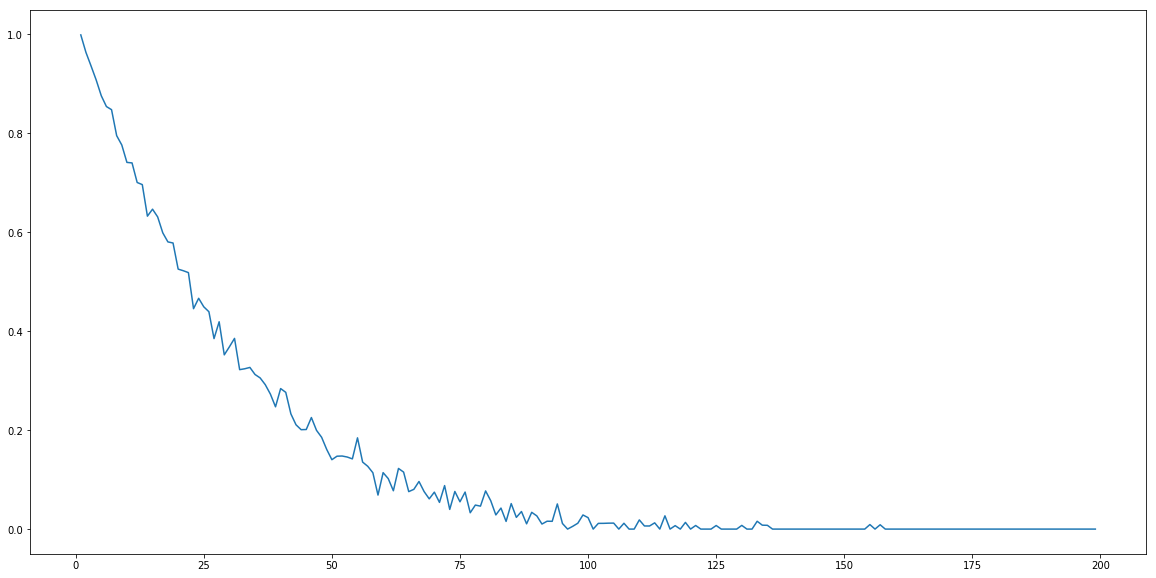

In [70]:
plt.figure(figsize=(20,10))
plt.plot(range(1,200),LProb)

plt.show()

> b) Si usted cuenta con 1000 bolitas, estime tanto téorica como empíricamente cuántas bolitas fallan en cada etapa. Compare sus resultados obtenidos.

*Recuerde que habrá una cantidad de bolitas que no fallarán*

### Desarrollo
Para realizarlo teóricamente, solo hace falta multiplicar la cantidad de bolitas por la probabilidad de que se cumpla, por cada segmento del trayecto. 

In [71]:
# Con las probabilidades de ocurrencia en cada sección del trayecto, se crea una lista secuencial de estas
Probabilidades = [3/5, 0.6, 0.8, 6/9, 0.3] 

# total de bolitas
Total = 1000

#lista que contendrá la cantidad de bolitas que fallan por tramo
winsPorTramo = []
for i in Probabilidades:
    Total = Total * i
    winsPorTramo.append(round(Total))

FallosPorTramo = []

FallosPorTramo.append(1000 - winsPorTramo[0])
FallosPorTramo.append(winsPorTramo[0] - winsPorTramo[1])
FallosPorTramo.append(winsPorTramo[1] - winsPorTramo[2])
FallosPorTramo.append(winsPorTramo[2] - winsPorTramo[3])
FallosPorTramo.append(winsPorTramo[3] - winsPorTramo[4])

Para mostrar empíricamente, se hace uso de la función randint del módulo random

In [72]:
# Empezamos con 1000 valores, despues del primer tramo, Range cambia a la cantidad de bolitas que lograron
# completar el trayecto

# Estas listas contienen las probabilidades por tramo
probT1 = [3/5, 2/5]
probT2 = [0.6, 0.4]
probT3 = [0.8, 0.2]
probT4 = [6/9, 3/9]
probT5 = [0.3, 0.7]

# Esta función elige un valor según una lista de probabilidades usando choices
def failsWithProb(Range,ListProbs):
    
    ListValues = [True, False]
    List = [rd.choices(ListValues,ListProbs).pop() for i in range(Range)]
    x = len(List)
    while True in List: List.remove(True)
    return (len(List), x - len(List))

fails1, Round1 = failsWithProb(1000, probT1)
fails2, Round2 = failsWithProb(Round1,probT2)
fails3, Round3 = failsWithProb(Round2, probT3)
fails4, Round4 = failsWithProb(Round3, probT4)
fails5, Round5 = failsWithProb(Round4, probT5)

In [73]:
print("Resultados obtenidos teóricamente")
a = [print("La cantidad de fallos en el tramo", x+1, "fueron", 
           FallosPorTramo[x]) for x in range(len(FallosPorTramo))]
print("\nResultados obtenidos empíricamente")
print("La cantidad de fallos en el tramo 1 fueron", fails1)
print("La cantidad de fallos en el tramo 2 fueron", fails2)
print("La cantidad de fallos en el tramo 3 fueron", fails3)
print("La cantidad de fallos en el tramo 4 fueron", fails4)
print("La cantidad de fallos en el tramo 5 fueron", fails5)

Resultados obtenidos teóricamente
La cantidad de fallos en el tramo 1 fueron 400
La cantidad de fallos en el tramo 2 fueron 240
La cantidad de fallos en el tramo 3 fueron 72
La cantidad de fallos en el tramo 4 fueron 96
La cantidad de fallos en el tramo 5 fueron 134

Resultados obtenidos empíricamente
La cantidad de fallos en el tramo 1 fueron 422
La cantidad de fallos en el tramo 2 fueron 240
La cantidad de fallos en el tramo 3 fueron 55
La cantidad de fallos en el tramo 4 fueron 98
La cantidad de fallos en el tramo 5 fueron 136


Como se puede ver, en ambos casos los resultados son similares, pero en el segundo, los resultados varían según el número que la función choice escoja

> c) Determine la función de probabilidad que rige este fenómeno según todos los estados posibles de la bolita

### Desarrollo
La función de probabilidad consiste en la probabilidad de que la bola quede en un estado específico...

X $\in$ {0,1,2,3,4,5}



P(X = 0) = 1 - p1

P(X = 1) = p1 * (1-p2)

P(X = 2) = p1 * p2 * (1-p3)

P(X = 3) = p1 * p2 * p3 * (1-p4)

P(X = 4) = p1 * p2 * p3 * p4 * (1-p5)

P(X = 5) = p1 * p2 * p3 * p4 * p5

In [74]:
PF = [1 - p1, p1 * (1-p2), p1 * p2 * (1-p3), p1 * p2 * p3 * (1-p4), p1 * p2 * p3 * p4 * (1-p5), p1 * p2 * p3 * p4 * p5]

>d) Genere 1000 valores aleatorios que sigan la función de probabilidad que encontró en c), haga un histograma y compare con lo obtenido en b)

### Desarrollo
Se agrega a un diccionario, cuyas llaves corresponden a cada estado, la frecuencia obtenida en cada una a partir de la prueba con 1000....

In [84]:
XPF = []
Estados = {}

for i in range(6):
    Estados[i] = 0

for i in range(1000):
    randEst = rd.choices([0,1,2,3,4,5],PF)[0]
    XPF.append(randEst)
    Estados[randEst] += 1

{0: 410, 1: 228, 2: 78, 3: 92, 4: 126, 5: 66}


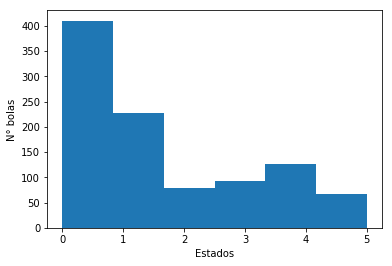

In [99]:
print(Estados)

plt.xlabel("Estados")
plt.ylabel("N° bolas")
plt.hist(XPF,bins = 6)
plt.show()

La cantidad de bolas que queda en cada estado es aproximadamente similar a los valores obtenidos en b)
    
    Resultados obtenidos empíricamente
La cantidad de fallos en el tramo 1 fueron 396  
La cantidad de fallos en el tramo 2 fueron 225  
La cantidad de fallos en el tramo 3 fueron 84  
La cantidad de fallos en el tramo 4 fueron 107  
La cantidad de fallos en el tramo 5 fueron 132  

Son distintos en el tramo final, porque en b) no se consideran las bolas que quedan en el estado final, en cuyo caso serían  
(396 + 225 + 84 + 107 + 132 + br) &nbsp;&nbsp;&nbsp; #br: bolas restantes  
br = 56

## 3. Perritos Enfermos

Usted trabaja en un refugio de animales que se especializa en recibir perros, además de contar con el equipo necesario para tratar con enfermedades que estos puedan presentar. Viendo las noticias se enteró que un virus sumamente peligroso para los perros se está expandiendo rápidamente por la zona y sospecha que algunos de los perros bajo su cuidado pueden estar infectados pero, no presentan un síntoma de momento. Para suerte suya este virus tiene cura hace tiempo y cuenta con el equipo para analizar muestras de saliva para detectar qué perro está infectado con el virus o no.

Usted tiene 500 perros, para no hacer la prueba 1 a 1 ha decidido juntar muestras de saliva en grupos de $K$ perros (con $K$ siendo un divisor de 500), y en caso de que el examen arroje positivo hará la prueba 1 a 1 del grupo. Asuma que 8 perros están infectados, pero usted no sabe esto a priori.

>a) ¿Es posible determinar **teóricamente** un $K$ tal que la cantidad de veces que se realiza la prueba sea la menor posible? De ser así, encuentre dicho K. ¿Qué distribución es comparable a este fenómeno?

### Desarrollo

T: Cantidad de pruebas en la primera etapa  
Tt: Cantidad de pruebas final  
R: Resultado de la prueba  

**Peor caso**: Todo R = V  
**Mejor caso**: Todo R = F  
El peor caso es en el cual todos los perros están infectados, lo que implicaría tener que hacer experimentos a cada perro de cada grupo, después de haber realizado el inicial a cada uno de estos.
El mejor, en cambio, es en el que todos están sanos, lo que conllevaría a una menor cantidad de experimentos.

Ejemplificando con K = 1, en este caso el peor caso concuerda con el mejor caso, puesto que, al estar separados los perros en grupos de a 1, es necesario hacer el experimento con todos.  

**K = 1**  
T = Tt = 500

**K = 2**  
T = 250  
Peor caso: Tt = 500 + 250 = 750  
Mejor caso: Tt = 250

**K = 4**  
T = 125  
PC: Tt = 625  
MC: Tt = 125

**K = 5**  
T = 100  
PC: Tt = 600  
MC: Tt = 100

**K = 10**  
T = 50  
PC: Tt = 550  
MC: Tt = 50

**K = 20**  
T = 25  
PC: Tt = 525  
MC: Tt = 25

**K = 25**  
T = 20  
PC: Tt = 520  
MC: Tt = 20

**K = 50**  
T = 10  
PC: Tt = 510  
MC: Tt = 10

**K = 100**  
T = 5  
PC: Tt = 505  
MC: Tt = 5

**K = 125**  
T = 4  
PC: Tt = 504  
MC: Tt = 4

**K = 250**  
T = 2  
PC: Tt = 502  
MC: Tt = 2

**K = 500**  
T = 1  
PC: Tt = 501  
MC: Tt = 1


A partir del peor y mejor caso para cada K, ignorando la probabilidad de que un perro esté enfermo, la menor cantidad de experimentos corresponde a----- ya que la cantidad de experimentos promedio corresponde ------
En principio, pareciera que siguiera una distribución hipergeométrica. Sin embargo, falta considerar las probabilidades. 
A pesar de ser desconocidas, intuitivamente la probabilidad del peor caso va aumentando a medida que aumenta K, puesto que solo se tiene una oportunidad de que no hayan 
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH


>b) Encuentre **empíricamente** un valor de $K$ que minimice la cantidad de veces que se realiza la prueba y compare con el obtenido en a)

### Desarrollo
Idea: Generar valores aleatorios para cada perro (estado de salud), agruparlos en distintas cantidades. Para cada una de estas, mostrar la cantidad de pruebas realizadas.

In [130]:
Poss_K = [1,2,4,5,10,20,25,50,100,125,250,500] #Posibles valores de K

In [20]:
#n: perros infectados

#se genera lista de perros con n infectados; 0: sano, 1: infectado
def generate_doggos(r, n = 0):

    doggos = []
    if r:
        for i in range(500):
            doggos.append(rd.randint(0,2))
    else:
        randl = random.sample(range(500),n)
        for i in range(500):
            doggos.append(0)
        for j in randl:
            doggos[j] = 1
        
    return doggos


#Cantidad de experimentos realizados según K
def testQ(K, doggos):
    
    #cantidad experimentos
    Tt = 0

    #se itera sobre grupos de largo K
    args = [iter(doggos)] * K 
    for groupK in zip_longest(*args):
        
        if K != 1 and sum(groupK) > 0:
            
            for perro in groupK:
                Tt += 1
        
        Tt += 1
    
    return Tt


#Cantidad promedio de experimentos realizados por cada K
def testQprom(K, doggos):

    Tot = 0
    N = 100
    
    for i in range(N):
        Tot += testQ(K, doggos)
    
    return Tot/N


In [23]:
d1 = generate_doggos(True)

for i in Poss_K:
    print("K =",i,":",testQprom(i,d1))

K = 1 : 500.0
K = 2 : 626.0
K = 4 : 585.0
K = 5 : 590.0
K = 10 : 550.0
K = 20 : 525.0
K = 25 : 520.0
K = 50 : 510.0
K = 100 : 505.0
K = 125 : 504.0
K = 250 : 502.0
K = 500 : 501.0


Con los resultados se obtiene, al igual que en a), que con K = 1 se realiza la menor cantidad de experimentos.
Se tiene una cantidad aleatoria de perros infectados, lo que produce que haya una cantidad mixta de cada grupo, por lo que aumenta la probabilidad de un peor caso. En específico, a partir de K = 10, se mantienen los peores casos.

>c) Ahora usted conoce la cantidad de perros infectados, realice el mismo experimento que en b) y compare sus resultados. ¿A qué se debe esta diferencia? 

### Desarrollo
Se genera una lista de perros con 8 infectados distribuidos aleatoriamente.

In [26]:


d2 = generate_doggos(False,8)

for i in Poss_K:
    print("K =", i,":", testQprom(i,d2))

K = 1 : 500.0
K = 2 : 266.0
K = 4 : 157.0
K = 5 : 135.0
K = 10 : 100.0
K = 20 : 125.0
K = 25 : 145.0
K = 50 : 260.0
K = 100 : 305.0
K = 125 : 379.0
K = 250 : 502.0
K = 500 : 501.0


La diferencia con los resultados anteriores se debe al desconocimiento inicial de la probabilidad de infección de un perro. En este caso, al saber que la probabilidad es relativamente baja, los promedios de cantidades de experimentos realizados disminuye. Resultando así en que la menor cantidad de experimentos corresponde aproximadamente 120, con K = 10.

### --------- PLAN B ----------


### Desarrollo
Idea: Generar valores aleatorios para cada perro (estado de salud), agruparlos en distintas cantidades. Para cada una de estas, mostrar la cantidad de pruebas realizadas.

In [105]:
Poss_K = [1,2,4,5,10,20,25,50,100,125,250,500] #Posibles valores de K

In [136]:
from itertools import zip_longest
from numpy import random as rd
import random

#n: perros infectados

#se genera lista de perros con n infectados; 0: sano, 1: infectado
def generate_doggos(n):

    doggos = []

    randl = random.sample(range(500),n)
    
    for i in range(500):
        doggos.append(0)
    
    for j in randl:
        doggos[j] = 1
        
    return doggos


#pregunta b

#Cantidad de experimentos realizados según K
def testQ(K, n):
    
    doggos = generate_doggos(n)
    
    #cantidad experimentos
    Tt = 0

    #se itera sobre grupos de largo K
    args = [iter(doggos)] * K 
    for groupK in zip_longest(*args):
        
        if K != 1 and sum(groupK) > 0:
            
            for perro in groupK:
                Tt += 1
        
        Tt += 1
    
    return Tt


#pregunta c

#cantidad de experimentos realizados hasta encontrar n cantidad de perros
def testQFind(K, n):
    
    doggos = generate_doggos(n)

    #cantidad experimentos
    Tt = 0
    #cantidad de perros infectados encontrados
    DFound = 0
    
    #se itera sobre grupos de largo K
    args = [iter(doggos)] * K 
    for groupK in zip_longest(*args):
        
        if K != 1:
            Tt += 1
        
        if sum(groupK) > 0 or K == 1:
                
            for perro in groupK:
                    
                Tt += 1
                
                if perro == 1:
                    DFound += 1
                
                if DFound == n:
                    return Tt

    return "Error: no hay n perros infectados"


#Cantidad promedio de experimentos realizados por cada K
def testQprom(K, doggos, p):

    Tot = 0
    N = 10000
    
    if p == 'b':
        for i in range(N):
            Tot += testQ(K, doggos)
    
    elif p == 'c':
        for i in range(N):
            Tot += testQFind(K,8)

    return Tot/N


### Desarrollo
Se genera una lista de perros con 8 infectados distribuidos aleatoriamente.

In [137]:
for i in Poss_K:
    print("K =", i,":", testQprom(i,8,'b'))

K = 1 : 500.0
K = 2 : 265.8812
K = 4 : 156.3508
K = 5 : 138.8915
K = 10 : 124.953
K = 20 : 165.194
K = 25 : 189.3425
K = 50 : 296.44
K = 100 : 421.89
K = 125 : 454.0
K = 250 : 500.025
K = 500 : 501.0


Se encuentra que la menor cantidad de experimentos realizados corresponde a aproximadamente 125 con K = 10.

>c) Ahora usted conoce la cantidad de perros infectados, realice el mismo experimento que en b) y compare sus resultados. ¿A qué se debe esta diferencia? 

### Desarrollo

Hay que realizar experimentos hasta encontrar los 8 perros infectados con tal de realizar la menor cantidad de ellos.

In [149]:
for i in Poss_K:
    print(testQprom(i, 8,'c'))
    

445
253
137
137
111
184
122
230
334
266
487
493


445.7212
238.1229
141.4575
126.3344
115.7504
153.9941
176.6006
274.0682
386.107
412.6197
446.0938
445.8133


In [150]:
for i in Poss_K:
    print(testQFind(i, 8))


424
261
135
127
122
154
208
350
374
433
469
481


## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el día 27 de Abril a las 15hrs.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.3
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)